<h1 align='center'>9.2 Plotting with pandas and seaborn Part I

<h3>Line Plots

Series and DataFrame each have a plot attribute for making some basic plot types. 

By default, plot() makes line plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

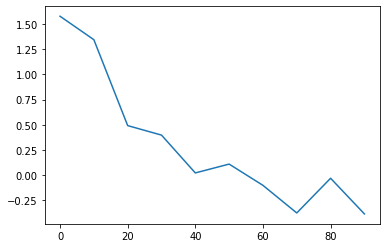

In [2]:
s.plot()

The Series object’s index is passed to matplotlib for plotting on the x-axis, though youcan  disable  this  by  passing  use_index=False.  

The  x-axis  ticks  and  limits  can  beadjusted  with  the  xticks  and  xlim  options,

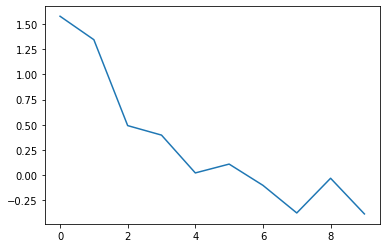

In [3]:
s.plot(use_index=False)

Most  of  pandas’s  plotting  methods  accept  an  optional  ax  parameter,  which  can  be  amatplotlib subplot object. This gives you more flexible placement of subplots in a gridlayout

DataFrame’s  plot  method  plots  each  of  its  columns  as  a  different  line  on  the  samesubplot, creating a legend automatically 

In [4]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))

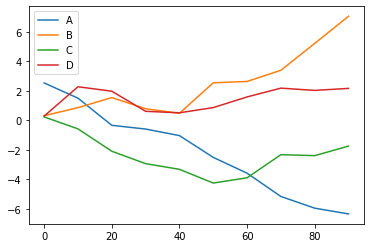

In [5]:
df.plot()

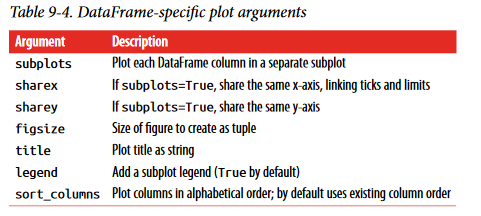


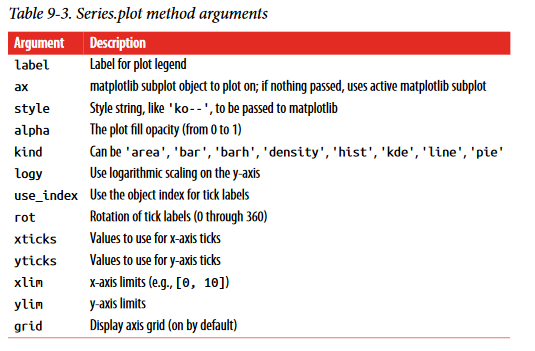



<h3> Bar Plots

The  plot.bar()  and  plot.barh()  make  vertical  and  horizontal  bar  plots,  respec‐tively.  In  this  case,  the  Series  or  DataFrame  index  will  be  used  as  the  x  (bar)  or  y(barh) ticks 

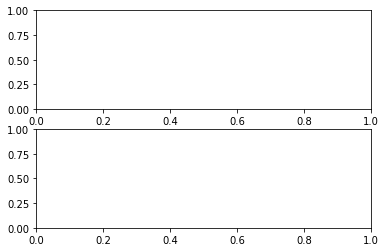

In [6]:
fig, axes = plt.subplots(2, 1)

In [7]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [8]:
data.plot.bar(ax=axes[0], color='k', alpha=0.7)

In [9]:
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

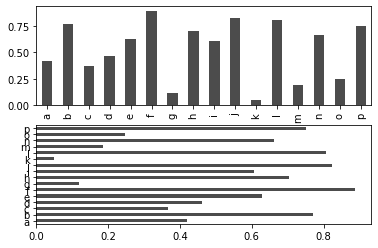

In [10]:
fig

The options color='k' and alpha=0.7 set the color of the plots to black and use par‐tial transparency on the filling

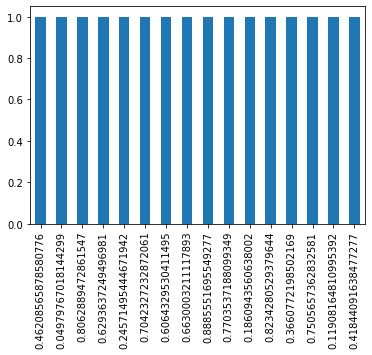

In [11]:
data.value_counts().plot.bar()

In [12]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

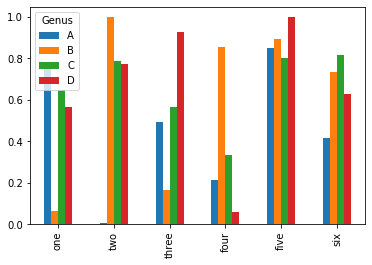

In [13]:
df.plot.bar()

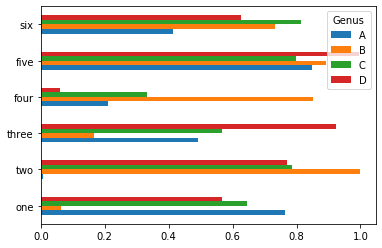

In [14]:
df.plot.barh()

Note that the name “Genus” on the DataFrame’s columns is used to title the legend

We create stacked bar plots from a DataFrame by passing stacked=True, resulting inthe value in each row being stacked together 

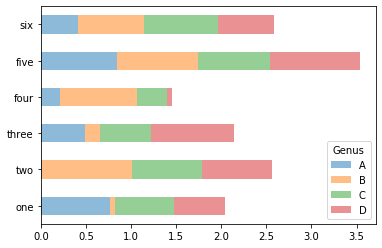

In [15]:
df.plot.barh(stacked=True, alpha=0.5)

Suppose we wanted to makea  stacked  bar  plot  showing  the  percentage  of  data  points  for  each  party  size  on  eachday.

In [18]:
tips = pd.read_csv(r'D:/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Using pandas inbuilt plot() function

In [19]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts.head()

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [20]:
party_counts = party_counts.loc[:, 2:5]

In [22]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


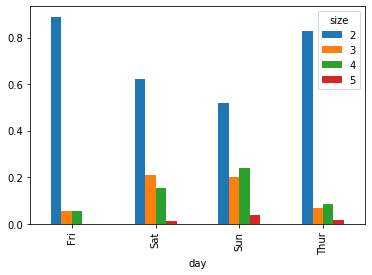

In [24]:
party_pcts.plot.bar()

Using Seaborn

In [31]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [32]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


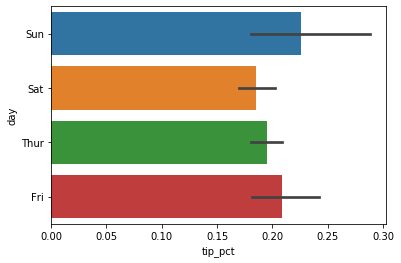

In [33]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

Plotting  functions  in  seaborn  take  a  data  argument,  which  can  be  a  pandas  Data‐Frame.  The  other  arguments  refer  to  column  names.  Because  there  are  multipleobservations for each value in the day, the bars are the average value of tip_pct. Theblack lines drawn on the bars represent the 95% confidence interval

seaborn.barplot has a hue option that enables us to split by an additional categoricalvalue 

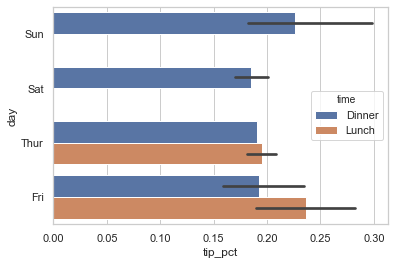

In [36]:
sns.set(style="whitegrid")
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

<h3>Histograms and Density Plots

A  histogram  is  a  kind  of  bar  plot  that  gives  a  discretized  display  of  value  frequency.The  data  points  are  split  into  discrete,  evenly  spaced  bins,  and  the  number  of  datapoints in each bin is plotted.

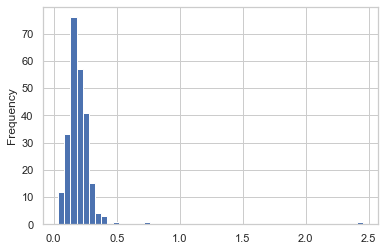

In [37]:
tips['tip_pct'].plot.hist(bins=50)

A  related  plot  type  is  a  density  plot,  which  is  formed  by  computing  an  estimate  of  acontinuous probability distribution that might have generated the observed data. Theusual procedure is to approximate this distribution as a mixture of “kernels”—that is,simpler distributions like the normal distribution. Thus, density plots are also knownas  kernel  density  estimate  (KDE)  plots.  

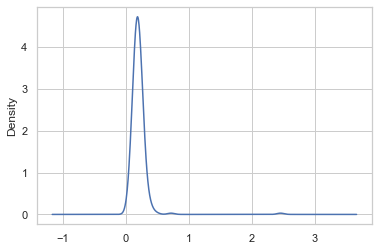

In [38]:
tips['tip_pct'].plot.density()

Seaborn  makes  histograms  and  density  plots  even  easier  through  its  distplotmethod, which can plot both a histogram and a continuous density estimate simulta‐neously.

(array([0.]), array([1.]))

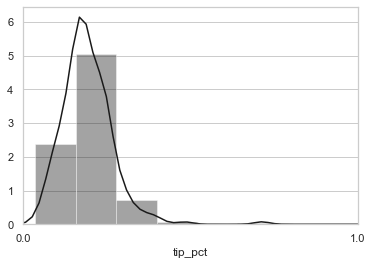

In [43]:
p=sns.distplot(tips['tip_pct'], bins=20, color='k')
p.set_xlim(['0.0', '1.0'])